<a href="https://colab.research.google.com/github/ihagoSantos/machine_learning/blob/main/ridge_and_lasso_linear_regression_bosto_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [10]:
X = data
print("Número de atributos original:")
print(X.shape)

Número de atributos original:
(506, 13)


In [14]:
# O PolynomialFeatures() aumenta a dimensão dos dados produzindo novos atriburtos
# que são combinações lineares dos dados originais.
# Por exemplo: os atributos x1 e x2 serão combinados da seguinte forma:
# x1x2, (x1^2)x2, x1(x2^2), (x1^2)(x2^2)

X = MinMaxScaler().fit_transform(data)
X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

print("Polinomial Features (atributos redundantes):")
print(X.shape)

Polinomial Features (atributos redundantes):
(506, 104)


In [15]:
y = target

# Regressão Linear
Os passos para indução de um modelo são:
1. Instanciar o modelo: LinearRegression()
2. Treinar o modelo: fit()

O método score() retorna o coeficiente R^2 de predição

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

lr = LinearRegression().fit(X_train, y_train)

print("Regressão Linear (com atributos redundantres)")
print("Acurácia da base de treinamento: {:.2f}".format(lr.score(X_train, y_train)))
print("Acurácia da base de teste: {:.2f}".format(lr.score(X_test, y_test)))

Regressão Linear (com atributos redundantres)
Acurácia da base de treinamento: 0.95
Acurácia da base de teste: 0.61


# Ridge (Regressão Linear com regularização L2)
Força uma redução do valor dos coeficientes, penalizando coeficientes grandes que não contribuem significativamente para a explicação da variância do sinal.

A força da regularização é dada pelo atributo alpha, com valor default igual a 1.

In [26]:
def get_ridge_and_sumary(xTrain, xTest, yTrain, yTest, alpha=1):
  ridge = Ridge(alpha).fit(xTrain, yTrain) # Valor default do alpha é 1

  print("-"*50)
  print("Ridge alpha = {}".format(alpha))
  print("Acurácia na base de treinamento: {:.2f}".format(ridge.score(xTrain, yTrain)))
  print("Acurácia na base de test: {:.2f}".format(ridge.score(xTest, yTest)))
  print("-"*50)
  return ridge


ridge = get_ridge_and_sumary(
    xTrain = X_train,
    xTest = X_test,
    yTrain = y_train,
    yTest = y_test
)
ridge10 = get_ridge_and_sumary(
    xTrain = X_train,
    xTest = X_test,
    yTrain = y_train,
    yTest = y_test,
    alpha=10
)
ridge01 = get_ridge_and_sumary(
    xTrain = X_train,
    xTest = X_test,
    yTrain = y_train,
    yTest = y_test,
    alpha=0.1
)

--------------------------------------------------
Ridge alpha = 1
Acurácia na base de treinamento: 0.89
Acurácia na base de test: 0.75
--------------------------------------------------
--------------------------------------------------
Ridge alpha = 10
Acurácia na base de treinamento: 0.79
Acurácia na base de test: 0.64
--------------------------------------------------
--------------------------------------------------
Ridge alpha = 0.1
Acurácia na base de treinamento: 0.93
Acurácia na base de test: 0.77
--------------------------------------------------


# Comparação da Regressão Linear e Ridge

O Gráfico exibe a magnitude dos coeficientes obtidos por cada método.
Pode-se observar como a regularização afeta a magnitude dos coeficientes do Ridge como um todo, mas sem zear coeficientes de uma forma geral.

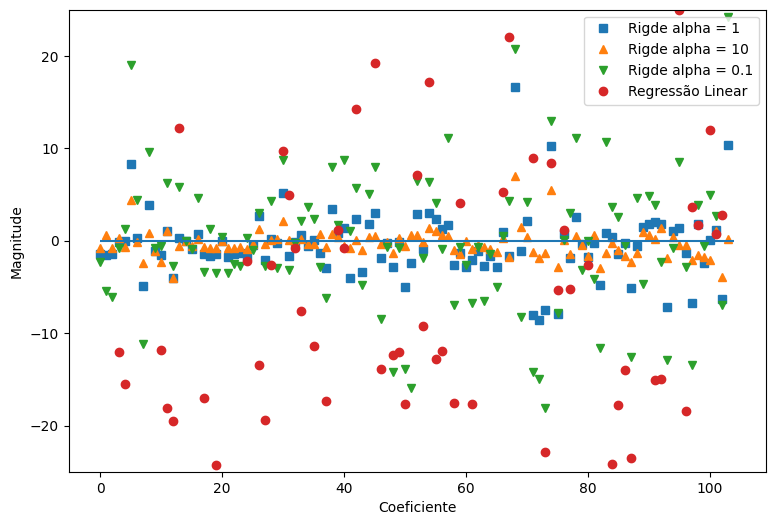

In [27]:
plt.figure(figsize=(9,6))
plt.plot(ridge.coef_, 's', label="Rigde alpha = 1")
plt.plot(ridge10.coef_, '^', label="Rigde alpha = 10")
plt.plot(ridge01.coef_, 'v', label="Rigde alpha = 0.1")
plt.plot(lr.coef_, 'o', label="Regressão Linear")
plt.xlabel("Coeficiente")
plt.ylabel("Magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

# LASSO (Regressão Linear com Regularização L1)

Força uma regularização dos coeficientes, podendo zerar diversos coeficientes cujos atributos não contribuem significativamente para a previsão. Muito utilizado no apoio à tarefa de seleção de atributos (feature selection).

A força da regularização é dada pelo atributo alpha, com valor default igual a 1. Alpha = 0 resulta na regressão linear tradicional.

In [30]:
lasso = Lasso().fit(X_train, y_train) # O valor default do alpha é 1
print("Lasso alpha = 1")
print("Acurácia na base de treinamento: {:.2f}".format(lasso.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(lasso.score(X_test, y_test)))
print("Número de atributos usados: {}\n".format(np.sum(lasso.coef_ != 0)))

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Lasso alpha = .01")
print("Acurácia na base de treinamento: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Número de atributos usados: {}\n".format(np.sum(lasso001.coef_ != 0)))

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Lasso alpha = .0001")
print("Acurácia na base de treinamento: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Número de atributos usados: {}\n".format(np.sum(lasso00001.coef_ != 0)))

Lasso alpha = 1
Acurácia na base de treinamento: 0.29
Acurácia na base de teste: 0.21
Número de atributos usados: 4

Lasso alpha = .01
Acurácia na base de treinamento: 0.90
Acurácia na base de teste: 0.77
Número de atributos usados: 33

Lasso alpha = .0001
Acurácia na base de treinamento: 0.95
Acurácia na base de teste: 0.64
Número de atributos usados: 96



# LASSO Vs. Ridge

Text(0, 0.5, 'Magnitude')

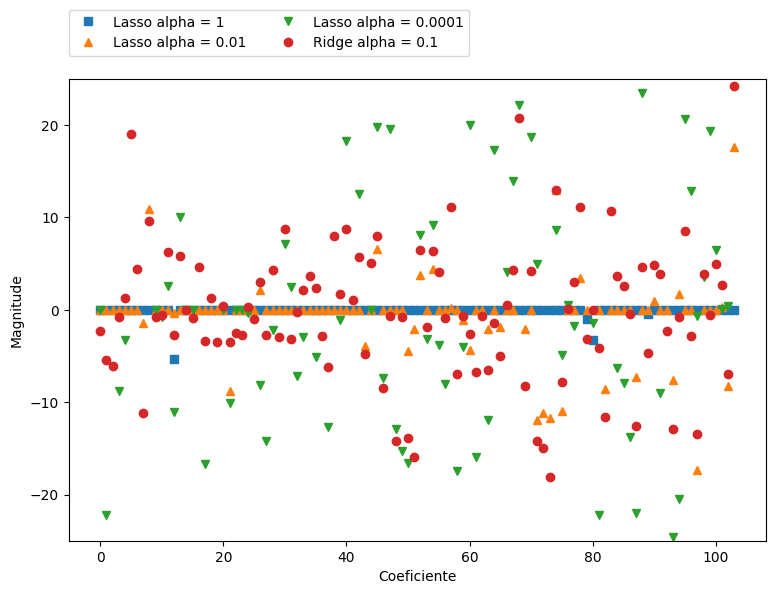

In [34]:
plt.figure(figsize=(9,6))
plt.plot(lasso.coef_, 's', label="Lasso alpha = 1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha = 0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha = 0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha = 0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25,25)
plt.xlabel("Coeficiente")
plt.ylabel("Magnitude")